In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import requests
import json

In [2]:
# Make a request to the API address from Toronto Police Department
response = requests.get("https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/Major_Crime_Indicators/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")

In [3]:
#make sure that the request worked well
if response.status_code==200:
    data =response.json()
    formatted_data =json.dumps(data, indent=4, sort_keys=True)
    print(formatted_data)
else:
    print("Failed to retrieve the data from the Toronto Police API")

{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    -79.50447515,
                    43.76637136
                ],
                "type": "Point"
            },
            "id": 1,
            "properties": {
                "Division": "D31",
                "Hood_ID": "27",
                "Index_": 201,
                "Latitude": 43.76637136,
                "Longitude": -79.50447515,
                "Neighbourhood": "York University Heights",
                "ObjectId": 1,
                "event_unique_id": "GO-20141273318",
                "location_type": "Apartment (Rooming House, Condo)",
                "mci_category": "Assault",
                "occurrencedate": 1388725200000,
                "occurrenceday": 3,
                "occurrencedayofweek": "Friday    ",
                "occurrencedayofyear": 3,
                "occurrencehour": 11,
                "occurrencemonth": "January",
                "occurrence

In [4]:
#Count the number of crimes
crimes_count = len(data["features"])


In [5]:
#Print the number of crimes
print(f"features:{crimes_count}")

features:1000


In [6]:
#create a variable to call the json for each crime type
types=["Assault","Auto_Theft","Break_and_Enter","Homicide_ASR_RC_TBL_002","Robbery","Theft_Over","Bicycle_Thefts","Shootings_and_Firearm_Discharges"
     ,"Theft_from_Motor_Vehicle"]
#variable to store the sum of each crime types
count=[]
#loop through each of the crime types to call the json to extract the total no of crimes
for types1 in types:
    try:
        url=f"https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/{types1}/FeatureServer/0/query?where=1%3D1&outFields=*&returnIdsOnly=true&outSR=4326&f=json"
        response_json=requests.get(url).json()
        count.append(response_json["objectIds"][-1])
    except:
        print("Cant find")

In [7]:
#Create data frame to store crime total for each of the crime type
count_df=pd.DataFrame({"What Crime Happened ":types,"Count of crimes":count})
count_df=count_df.sort_values("Count of crimes",ascending=False)
count_df

,What Crime Happened,Count of crimes
0,Assault,161833
8,Theft_from_Motor_Vehicle,76914
2,Break_and_Enter,56466
1,Auto_Theft,40794
6,Bicycle_Thefts,30154
4,Robbery,29230
5,Theft_Over,9936
7,Shootings_and_Firearm_Discharges,5535
3,Homicide_ASR_RC_TBL_002,1286


In [8]:
#download the top 3 crimes CSV files
#use glob to find all CSV files in a directory
all_files = glob.glob("Resources/*csv")

In [9]:
#create an empty list to store DataFrames
df_list =[]

In [10]:
#loop through each file and read it into a DataFrame
for file in all_files:
    df = pd.read_csv(file)
    df_list.append(df)

In [11]:
#concatenate the list of DataFrames into a single DataFrame
result = pd.concat(df_list, axis=0, ignore_index=True)

In [12]:
print(result.head())

              X             Y  OBJECTID event_unique_id Division  \
0 -8.847703e+06  5.416571e+06       2.0  GO-20141260128      D12   
1 -8.837275e+06  5.411569e+06       3.0  GO-20141259483      D52   
2 -8.840076e+06  5.413995e+06       5.0  GO-20141260137      D14   
3 -8.837968e+06  5.411025e+06       6.0  GO-20141259767      D52   
4 -8.837739e+06  5.411304e+06       7.0  GO-20141259762      D52   

           occurrencedate            reporteddate  \
0  2014/01/01 05:00:00+00  2014/01/01 05:00:00+00   
1  2013/12/31 05:00:00+00  2014/01/01 05:00:00+00   
2  2014/01/01 05:00:00+00  2014/01/01 05:00:00+00   
3  2014/01/01 05:00:00+00  2014/01/01 05:00:00+00   
4  2013/12/31 05:00:00+00  2014/01/01 05:00:00+00   

                                       location_type premises_type  ucr_code  \
0  Single Home, House (Attach Garage, Cottage, Mo...         House      1430   
1                                   Ttc Subway Train       Transit      1430   
2                               

In [13]:
result.columns

Index(['X', 'Y', 'OBJECTID', 'event_unique_id', 'Division', 'occurrencedate',
       'reporteddate', 'location_type', 'premises_type', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour',
       'mci_category', 'Hood_ID', 'Neighbourhood', 'Longitude', 'Latitude',
       'ObjectId2', 'Index_', 'MCI', 'Long', 'Lat', 'ObjectId', 'Offence'],
      dtype='object')

In [14]:
#Cleaning the data to analyse the premises_type first finding what we have in premises_type
result["premises_type"].unique()

array(['House', 'Transit', 'Outside', 'Commercial', 'Apartment', 'Other',
       'Educational'], dtype=object)

In [15]:
#changing this to a string 
def mylower(string,spli_character=" "):
    return string.lower()

In [16]:
#demonstrating that this is now a string
result["premises_type"].map(mylower)

0              house
1            transit
2            transit
3            outside
4         commercial
             ...    
295208       outside
295209       outside
295210       outside
295211       outside
295212       outside
Name: premises_type, Length: 295213, dtype: object

In [17]:
result.dtypes

X                      float64
Y                      float64
OBJECTID               float64
event_unique_id         object
Division                object
occurrencedate          object
reporteddate            object
location_type           object
premises_type           object
ucr_code                 int64
ucr_ext                  int64
offence                 object
reportedyear             int64
reportedmonth           object
reportedday              int64
reporteddayofyear        int64
reporteddayofweek       object
reportedhour             int64
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofyear    float64
occurrencedayofweek     object
occurrencehour           int64
mci_category            object
Hood_ID                 object
Neighbourhood           object
Longitude              float64
Latitude               float64
ObjectId2              float64
Index_                 float64
MCI                     object
Long    

In [18]:
# Get total counting by premises
crimes = result["premises_type"].value_counts()

In [19]:
crimes.head()

Outside       83435
Apartment     70607
House         57454
Commercial    48494
Other         20460
Name: premises_type, dtype: int64

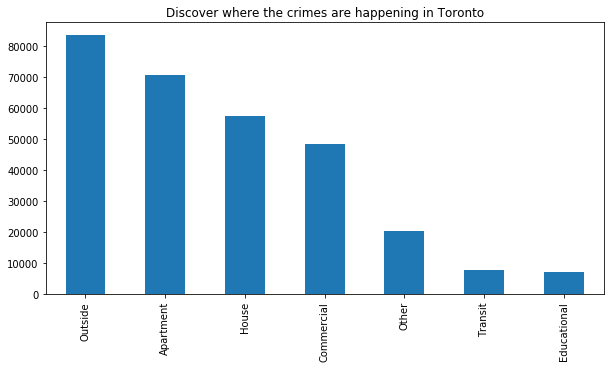

<Figure size 432x288 with 0 Axes>

In [20]:
# Use DataFrame.plot() in order to create a bar chart of the data
crimes.plot(kind="bar", figsize=(10, 5))

# Set a title for the chart
plt.title("Discover where the crimes are happening in Toronto")

plt.show()
plt.tight_layout()

In [21]:
#creating bar graphs for each crime
assault = "Resources/Assault.csv"

#Read each CSV separate for each type of crime
assault_df = pd.read_csv(assault)

# show columns or first lines what is best I don't know
assault_df.columns

Index(['X', 'Y', 'OBJECTID', 'event_unique_id', 'Division', 'occurrencedate',
       'reporteddate', 'location_type', 'premises_type', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour',
       'mci_category', 'Hood_ID', 'Neighbourhood', 'Longitude', 'Latitude',
       'ObjectId2'],
      dtype='object')

In [22]:
result["premises_type"].unique()

array(['House', 'Transit', 'Outside', 'Commercial', 'Apartment', 'Other',
       'Educational'], dtype=object)

In [23]:
#changing this to a string 
def mylower(string,spli_character=" "):
    return string.lower()

In [24]:
#demonstrating that this is now a string
result["premises_type"].map(mylower)

0              house
1            transit
2            transit
3            outside
4         commercial
             ...    
295208       outside
295209       outside
295210       outside
295211       outside
295212       outside
Name: premises_type, Length: 295213, dtype: object

In [25]:
result.dtypes

X                      float64
Y                      float64
OBJECTID               float64
event_unique_id         object
Division                object
occurrencedate          object
reporteddate            object
location_type           object
premises_type           object
ucr_code                 int64
ucr_ext                  int64
offence                 object
reportedyear             int64
reportedmonth           object
reportedday              int64
reporteddayofyear        int64
reporteddayofweek       object
reportedhour             int64
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofyear    float64
occurrencedayofweek     object
occurrencehour           int64
mci_category            object
Hood_ID                 object
Neighbourhood           object
Longitude              float64
Latitude               float64
ObjectId2              float64
Index_                 float64
MCI                     object
Long    

In [26]:
crime1 = result["premises_type"].value_counts()
crime1.head()

Outside       83435
Apartment     70607
House         57454
Commercial    48494
Other         20460
Name: premises_type, dtype: int64

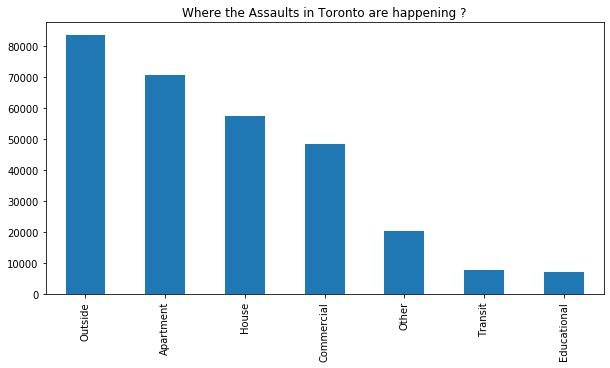

<Figure size 432x288 with 0 Axes>

In [27]:
# Use DataFrame.plot() in order to create a bar chart of the data
crime1.plot(kind="bar", figsize=(10, 5))

# Set a title for the chart
plt.title("Where the Assaults in Toronto are happening ?")

plt.show()
plt.tight_layout()

In [28]:
#creating bar graphs for each crime
tmv = "Resources/Theft_from_Motor_Vehicle.csv"

#Read each CSV separate for each type of crime
tmv_df = pd.read_csv(tmv)

# show columns or first lines what is best I don't know
tmv_df.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'Division', 'occurrencedate',
       'reporteddate', 'location_type', 'premises_type', 'ucr_code', 'ucr_ext',
       'Offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour',
       'mci_category', 'Hood_ID', 'Neighbourhood', 'Longitude', 'Latitude',
       'ObjectId'],
      dtype='object')

In [29]:
result["premises_type"].unique()

array(['House', 'Transit', 'Outside', 'Commercial', 'Apartment', 'Other',
       'Educational'], dtype=object)

In [30]:
#changing this to a string 
def mylower(string,spli_character=" "):
    return string.lower()

In [31]:
crime2 = result["premises_type"].value_counts()
crime2.head()

Outside       83435
Apartment     70607
House         57454
Commercial    48494
Other         20460
Name: premises_type, dtype: int64

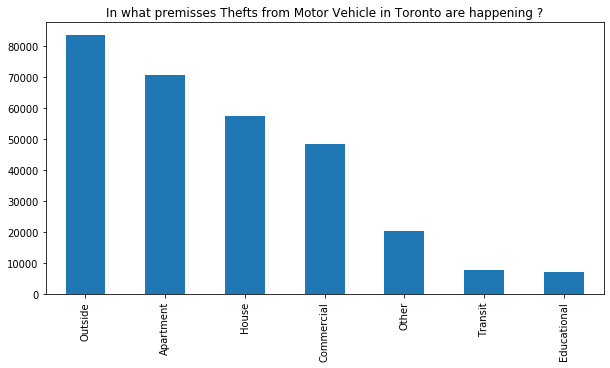

<Figure size 432x288 with 0 Axes>

In [32]:
# Use DataFrame.plot() in order to create a bar chart of the data
crime2.plot(kind="bar", figsize=(10, 5))

# Set a title for the chart
plt.title("In what premisses Thefts from Motor Vehicle in Toronto are happening ?")

plt.show()
plt.tight_layout()

In [33]:
#creating bar graphs for each crime
be = "Resources/Break_and_Enter.csv"

#Read each CSV separate for each type of crime
be_df = pd.read_csv(be)

# show columns or first lines what is best I don't know
be_df.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'Division', 'occurrencedate',
       'reporteddate', 'location_type', 'premises_type', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour', 'MCI',
       'Hood_ID', 'Neighbourhood', 'Long', 'Lat', 'ObjectId'],
      dtype='object')

In [34]:
result["premises_type"].unique()

array(['House', 'Transit', 'Outside', 'Commercial', 'Apartment', 'Other',
       'Educational'], dtype=object)

In [35]:
#changing this to a string 
def mylower(string,spli_character=" "):
    return string.lower()

In [36]:
#demonstrating that this is now a string
result["premises_type"].map(mylower)

0              house
1            transit
2            transit
3            outside
4         commercial
             ...    
295208       outside
295209       outside
295210       outside
295211       outside
295212       outside
Name: premises_type, Length: 295213, dtype: object

In [37]:
crime3 = result["premises_type"].value_counts()
crime3.head()

Outside       83435
Apartment     70607
House         57454
Commercial    48494
Other         20460
Name: premises_type, dtype: int64

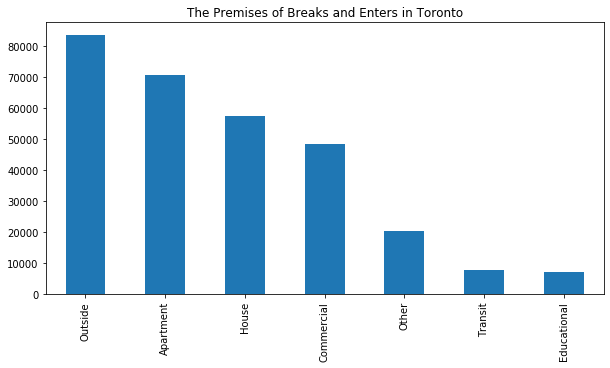

<Figure size 432x288 with 0 Axes>

In [38]:
# Use DataFrame.plot() in order to create a bar chart of the data
crime3.plot(kind="bar", figsize=(10, 5))

# Set a title for the chart
plt.title("The Premises of Breaks and Enters in Toronto")

plt.show()
plt.tight_layout()